#### NAMA : PADHLI MAULANA                                                    
#### NIM : 09011381722119

## PENERAPAN LOGIKA FUZZY DALAM OPTIMASI PRODUKSI BARANG MENGGUNAKAN METODE MAMDANI

   Metode Mamdani sering juga dikenal dengan nama metode Max-Min. metode ini diperkenalkan oleh Ebrahim Mamdani pada tahun 1975 (Kusuma Dewi, 2003). Untuk medapatkan output diperlukan beberapa tahapan, antara lain:
1. Pembentukan himpunan fuzzy.  
   Pada Metode Mamdani, baik variabel input maupun variabel output dibagi menjadi satu atau lebih himpunan fuzzy. 
2. Aplikasi fungsi implikasi
   Pada Metode Mamdani, fungsi implikasi yang digunakan adalah Min.
3. Komposisi aturan
   Tidak seperti penalaran monoton, apabila sistem terdiri dari beberapa aturan, maka inferensi diperoleh dari kumpulan dan
   kolerasi antar aturan. Ada 3 metode yang digunakan dalam melakukan inferensi sistem fuzzy, yaitu max, additive dan 
   probabilistik OR (probor).
    

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

- import

  import berfungsi untuk multi file maksudnya yaitu kita dapat memanggil file lain di dalam satu module yang berbeda.


- Numpy 
 
  memiliki kegunaan untuk operasi vektor dan matriks. Fiturnya hampir sama dengan MATLAB dalam mengelola array dan array
  multidimensi. Numpy merupakan salah satu library yang digunakan oleh library lain seperti Scikit-Learn untuk keperluan 
  analisis data.
  
  
- Scikit-fuzzy

  Scikit-Fuzzy adalah kumpulan algoritma fuzzy logic yang dimaksudkan untuk digunakan dalam SciPy Stack, yang ditulis dalam 
  bahasa Python.
  
  
- Matplotlib

   Matplotlib berfungsi untuk memvisualisasikan data dengan lebih indah dan rapi.Matplotlib adalah library paling banyak 
   digunakan oleh data science untuk menyajikan datanya ke dalam visual yang lebih baik

  

Input :
Permintaan dibagi menjadi 3 bagian yakni :
- Sangat Turun (0 - 25.000)
- Turun(20.000 - 30.000)
- Naik ( 25.000 - 60.000)


Persediaan dibagi menjadi 3 bagian yakni:
- Sangat Sedikit (0 - 2.000)
- Sedikit (1.000 - 3.000)
- Banyak (2.000 - 5.000)

Output : 
Produksi  dibagi menjadi 3 bagian yakni :
- Sangat Berkurang (0 - 20.000)
- Berkurang (15.000 - 60.000)
- Bertambah (50.000 - 70.000)


In [35]:
permintaan = ctrl.Antecedent(np.arange(1, 60000, 1000), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(1,5000,  100), 'persediaan')
produksi = ctrl.Consequent(np.arange(1,70000, 1000), 'produksi')

pada program ini saya menggunakan 2 input yaitu permintaan dan persediaaan,sedangkan outputnya 1 yaitu produksi.Dimana inputan permintaan  (1 (start), 60000(stop), 1000(step)) dan pesediaan ( 1(start),5000(stop),100(step) dan outputnya yaitu   produksi( 1(start), 70000(stop), 1000(step).

In [36]:
permintaan = ctrl.Antecedent(np.arange(1, 60000, 1000), 'permintaan')
permintaan_x =np.arange(1, 60000, 1000)#untuk plotting

### Fuzzifikasi Permintaan
Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk permintaan, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Permintaan $$
$$ Sangat Turun = 0 - 25.000 $$
$$ Turun = 20.000 - 30.000 $$
$$ Naik = 25.000 - 60.000 $$


Dengan fungsi keanggotaan permintaan

\begin{equation}
  Permintaan['Sangat Turun'] = \mu PermintaanSangatTurun(x)=\begin{cases}
    1, & \text{$0\leq x \leq 10.000$}.\\
    \left.(25.000 - x) \,  \right/(25000 - 10.000) , & \text{$10.000 \leq x \leq 25.000$}.\\
    0, & \text{$x\geq 25.000$}.
  \end{cases}
  \\
    Permintaan['Turun'] = \mu PermintaanTurun(x)=\begin{cases}
    0, & \text{$x\leq 20.000$ atau $x\geq30.000$}.\\
    \left.(x - 10.000)\, \right/(20.000 - 10.000) , & \text{$10.000 \leq x \leq 20.000$}.\\
    \left.(30.000 - x)\, \right/(30.000 - 20.000) , & \text{$20.000 \leq x \leq 30.000$}.\\
  \end{cases}
  \\
  Permintaan['Naik'] = \mu PermintaanNaik(x)=\begin{cases}
    0, & \text{$x \leq 25.000$}.\\
    \left.(x - 25.000) \,  \right/(50.000 - 25.000) , & \text{$25.000 \leq x \leq 30.000$}.\\
    1, & \text{$x\geq 30.000$}.
  \end{cases}
\end{equation}

In [37]:
permintaan['sangat turun'] = fuzz.trapmf(permintaan.universe, [0,1,10000,25000])
permintaan['turun'] = fuzz.trimf(permintaan.universe, [20000,25000,30000])
permintaan['naik'] = fuzz.trapmf(permintaan.universe, [25000, 50000, 60000, 60000])

 Inputan Permintaan  memiliki 3 himpunan yaitu sangat  menurun dan nilai domainnya [ 0, 1, 10.000, 25.000],menurun[20.000,25.000,30.000],dan naik[ 25.000,  50.000,  60.000,  60.000] dimana seluruh himpunan memiliki nilai max dan min yang berbeda.

#### PLOTTING MEMBERSHIP FUNCTION PERMINTAAN

Text(0.5,1,'permintaan sangat turun')

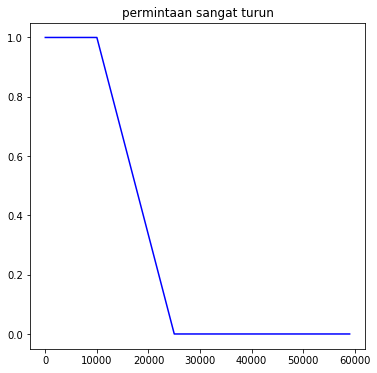

In [38]:
permintaan_sangat_turun = fuzz.trapmf(permintaan.universe, [0,1,10000,25000])
fig, (ax0) = plt.subplots(nrows= 1,figsize=(6,6))
ax0.plot(permintaan_x,permintaan_sangat_turun,'blue')
ax0.set_title('permintaan sangat turun')

Text(0.5,1,'permintaan turun')

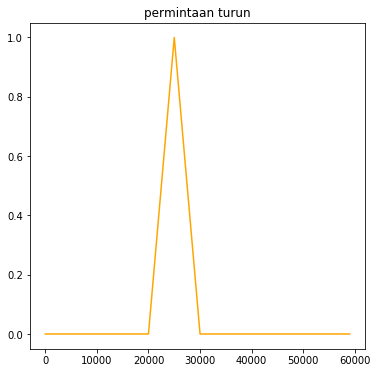

In [39]:
permintaan_turun= fuzz.trimf(permintaan.universe, [20000,25000,30000])
fig, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(permintaan_x,permintaan_turun,'orange')
ax1.set_title('permintaan turun')

Text(0.5,1,'permintaan naik')

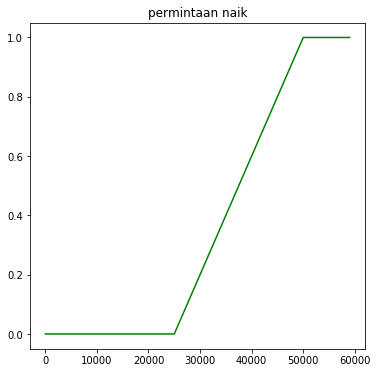

In [40]:
permintaan_naik= fuzz.trapmf(permintaan.universe, [25000, 50000, 60000, 60000])
fig, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(permintaan_x,permintaan_naik,'green')
ax2.set_title('permintaan naik')

C:\Users\PADHLI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


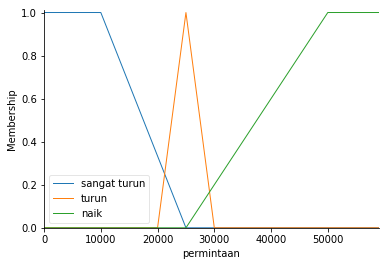

In [41]:
permintaan.view()

Dari grafik diatas dapat disimpulkan bahwa ketika membership sejajar tepat diatas nilai 10000 kemudian turun ke nilai 25000 maka permintaannya sangat menurun,dan ketika nilai 20000 lalu naik tepat di angka 1.0 membership dan kemudian turun lagi ke nilai 30000 maka permintaannya menurun,kemudian ketika nilai 25000 lalu naik ke angka1.0 membership kemudian sejajar tepat diatas nilai 50000 maka permintaannya naik.

### fuzzifikasi persediaan

In [42]:
persediaan = ctrl.Antecedent(np.arange(1,5000,100), 'persediaan')
persediaan_x =np.arange(1,5000,100)#untuk plotting

Untuk persediaan, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Persediaan $$
$$ Sangat Sedikit = 0 - 2.000 $$
$$ Sedikit = 1.000 - 3.000 $$
$$ Banyak = 2.000 - 5.000 $$

Dengan fungsi keanggotaan Persediaan

\begin{equation}
  Persediaan['Sangat Sedikit'] = \mu PersediaanSangatSedikit(x)=\begin{cases}
    1, & \text{$0\leq x \leq 500$}.\\
    \left.(2.000 - x) \,  \right/(2.000 - 500) , & \text{$500 \leq x \leq 2.000$}.\\
    0, & \text{$x\geq 2000$}.
  \end{cases}
  \\
    Persediaan['Sedikit'] = \mu PersediaanSedikit(x)=\begin{cases}
    0, & \text{$x\leq 1.000$ atau $x\geq3.000$}.\\
    \left.(x - 1.000)\, \right/(2.000 - 1000) , & \text{$1.000 \leq x \leq 2.000$}.\\
    \left.(3.000 - x)\, \right/(3.000 - 2.000) , & \text{$2.000 \leq x \leq 3.000$}.\\
  \end{cases}
  \\
  Persediaan['Banyak'] = \mu PersediaanBanyak(x)=\begin{cases}
    0, & \text{$x \leq 2.000$}.\\
    \left.(x - 2.000) \,  \right/(3.000 - 2.000) , & \text{$2.000 \leq x \leq 3.000$}.\\
    1, & \text{$x\geq 3.000$}.
  \end{cases}
\end{equation}

In [43]:
persediaan['sangat sedikit'] = fuzz.trapmf(persediaan.universe, [0,1,500,2000])
persediaan['sedikit'] = fuzz.trimf(persediaan.universe, [1000, 2000, 3000])
persediaan['banyak'] = fuzz.trapmf(persediaan.universe, [2000, 3000, 5000,5000])

pada inputan kedua yaitu persediaan terdapat himpunan [sangat sedikit],[sedikit],[banyak] dan nilai domainnya [0,1,500, 2000],[1000, 2000, 3000],[2000, 3000, 5000,5000] 

Text(0.5,1,'persediaan sangat sedikit')

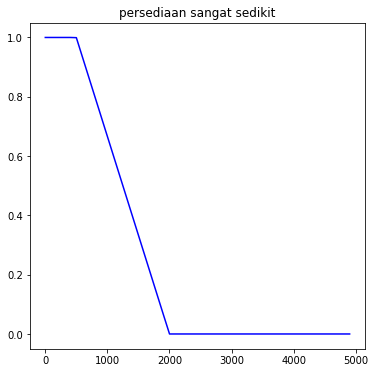

In [44]:
persediaan_sangat_sedikit = fuzz.trapmf(persediaan.universe, [0,1,500, 2000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(persediaan_x,persediaan_sangat_sedikit,'blue')
ax0.set_title('persediaan sangat sedikit')

Text(0.5,1,'persediaan sedikit')

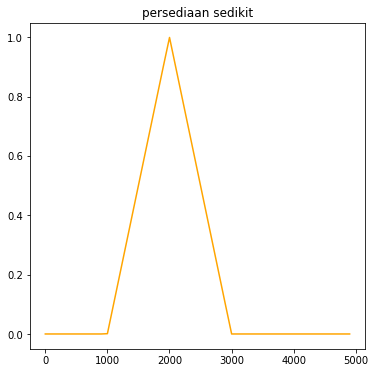

In [45]:
persediaan_sedikit = fuzz.trimf(persediaan.universe, [1000, 2000, 3000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(persediaan_x,persediaan_sedikit,'orange')
ax0.set_title('persediaan sedikit')

Text(0.5,1,'persediaan banyak')

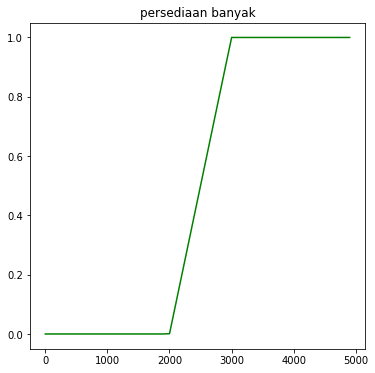

In [46]:
persediaan_banyak= fuzz.trapmf(persediaan.universe, [2000, 3000, 5000,5000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(persediaan_x,persediaan_banyak,'green')
ax0.set_title('persediaan banyak')

C:\Users\PADHLI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


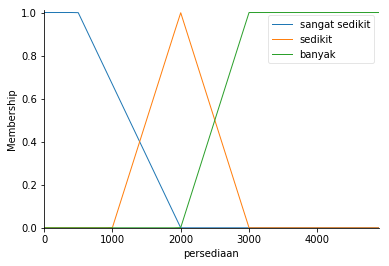

In [47]:
persediaan.view()

Dari grafik diatas dapat disimpulkan bahwa ketika membership sejajar tepat diatas nilai 500 kemudian turun ke nilai 2000 maka persediaannya sangat sedikit,dan ketika nilai 1000 lalu naik tepat di angka 1.0 membership dan kemudian turun lagi ke nilai 3000 maka persediaannya sedikit,kemudian ketika nilai 2000 lalu naik ke angka1.0 membership kemudian sejajar tepat diatas nilai 4000 maka persediaannya banyak.

### fuzzifikasi produksi

In [48]:
produksi = ctrl.Consequent(np.arange(1,70000, 1000), 'produksi')
produksi_x =np.arange(1,70000, 1000)#untuk plotting

Untuk produksi, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Produksi $$
$$ Sangat Berkurang = 0 - 20.000 $$
$$ Berkurang = 15.000 - 60.000 $$
$$ Bertambah = 50.000 - 70.000 $$

Dengan fungsi keanggotaan Produksi

\begin{equation}
  Produksi['Sangat Berkurang'] = \mu ProduksiSangatBerkurang(x)=\begin{cases}
    1, & \text{$0\leq x \leq 20.000$}.\\
    \left.(20.000 - x) \,  \right/(20.000 - 10.000) , & \text{$10.000 \leq x \leq 20.000$}.\\
    0, & \text{$x\geq 20.000$}.
  \end{cases}
  \\
    Produksi['Berkurang'] = \mu ProduksiBerkurang(x)=\begin{cases}
    0, & \text{$x\leq 15.000$ atau $x\geq60.000$}.\\
    \left.(x - 15.000)\, \right/(30.000 - 15.000) , & \text{$15.000 \leq x \leq 30.000$}.\\
    \left.(60.000 - x)\, \right/(60.000 - 30.000) , & \text{$30.000 \leq x \leq 60.000$}.\\
  \end{cases}
  \\
  Produksi['Bertambah'] = \mu ProduksiBertambah(x)=\begin{cases}
    0, & \text{$x \leq 50.000$}.\\
    \left.(x - 50.000) \,  \right/(60.000 - 50.000) , & \text{$50.000 \leq x \leq 60.000$}.\\
    1, & \text{$x\geq 60.000$}.
  \end{cases}
  \end{equation}

In [49]:
produksi['sangat berkurang'] = fuzz.trapmf(produksi.universe, [0,0,10000,20000])
produksi['berkurang'] = fuzz.trimf(produksi.universe, [15000, 30000,60000])
produksi['bertambah'] = fuzz.trapmf(produksi.universe, [50000, 60000, 70000, 70000])

Outputan produksi memiliki 3 himpunan yaitu sangat  berkurang,berkurang, dan bertambah dan nilai domainnya [ 0, 1, 10000, 20000],[15000,3000,60000],[ 50000,  60000,  70000,  70000] dimana seluruh himpunan memiliki nilai max dan min yang berbeda.

Text(0.5,1,'produksi_sangat_berkurang')

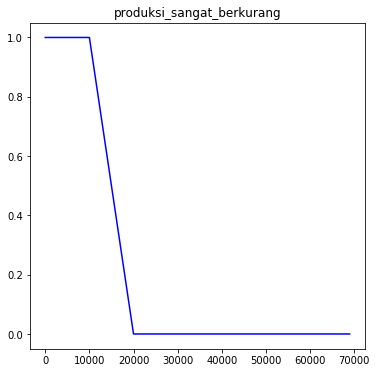

In [50]:
produksi_sangat_berkurang= fuzz.trapmf(produksi.universe, [0,0,10000,20000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(produksi_x,produksi_sangat_berkurang,'blue')
ax0.set_title('produksi_sangat_berkurang')

Text(0.5,1,'produksi berkurang')

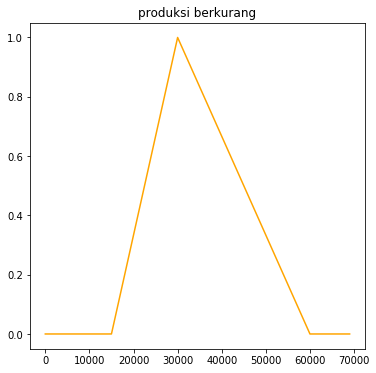

In [51]:
produksi_berkurang= fuzz.trimf(produksi.universe, [15000, 30000,60000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(produksi_x,produksi_berkurang,'orange')
ax0.set_title('produksi berkurang')

Text(0.5,1,'produksi_bertambah')

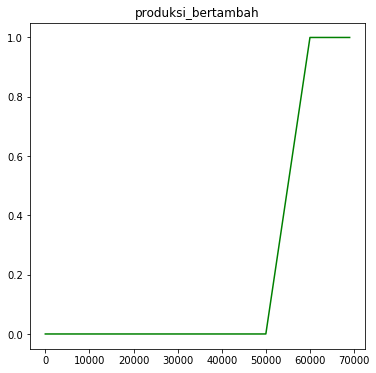

In [52]:
produksi_bertambah= fuzz.trapmf(produksi.universe, [50000, 60000, 70000, 70000])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(produksi_x,produksi_bertambah,'green')
ax0.set_title('produksi_bertambah')

C:\Users\PADHLI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


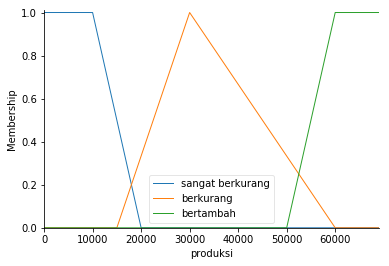

In [53]:
produksi.view()

Dari grafik diatas dapat disimpulkan bahwa ketika membership sejajar tepat diatas nilai 10000 kemudian turun ke nilai 20000 maka persediaannya sangat berkurang,dan ketika nilai 15000 lalu naik tepat di angka 1.0 membership dan kemudian turun lagi ke nilai 60000 maka persediaannya berkurang,kemudian ketika nilai 50000 lalu naik ke angka1.0 membership kemudian sejajar tepat diatas nilai 60000 maka persediaannya bertambah.

In [54]:
rule1 = ctrl.Rule(permintaan['sangat turun'] & persediaan['sangat sedikit'], produksi['sangat berkurang'])
rule2 = ctrl.Rule(permintaan['sangat turun'] & persediaan['sedikit'], produksi['berkurang'])
rule3 = ctrl.Rule(permintaan['sangat turun'] & persediaan['banyak'], produksi['berkurang'])
rule4 = ctrl.Rule(permintaan['turun'] & persediaan['sangat sedikit'], produksi['sangat berkurang'])
rule5 = ctrl.Rule(permintaan['turun'] & persediaan['sedikit'], produksi['berkurang'])
rule6 = ctrl.Rule(permintaan['turun'] & persediaan['banyak'], produksi['berkurang'])
rule7 = ctrl.Rule(permintaan['naik'] & persediaan['sangat sedikit'], produksi['berkurang'])
rule8 = ctrl.Rule(permintaan['naik'] & persediaan['sedikit'], produksi['bertambah'])
rule9 = ctrl.Rule(permintaan['naik'] & persediaan['banyak'], produksi['bertambah'])

### Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel permintaan yang berjumlah 3 dan fuzzifikasi dari variabel persediaan yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

rule 1 = IF permintaan sangat turun  dan persediaan sangat sedikit  THEN produksi sangat berkurang

rule 2 =  IF permintaan sangat turun  dan persediaan  sedikit  THEN produksi berkurang

rule 3 =  IF permintaan sangat turun  dan persediaan banyak  THEN produksi  berkurang

rule 4 =  IF permintaan  turun  dan persediaan sangat sedikit  THEN produksi sangat berkurang

rule 5 =  IF permintaan  turun  dan persediaan  sedikit  THEN produksi  berkurang

rule 6 =  IF permintaan  turun  dan persediaan banyak  THEN produksi berkurang

rule 7 =  IF permintaan naik  dan persediaan sangat sedikit  THEN produksi  berkurang

rule 8 =  IF permintaan naik  dan persediaan  sedikit THEN produksi bertambah

rule 9 =  IF permintaan naik  dan persediaan naik  THEN produksi bertambah

### RULE EVALUATION

In [55]:
barang_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

 - ctrl.ControlSystem berfungsi untuk menggabungkan rule menjadi satu,sedangkan
 - ctrl.ControlSystemSimulation berfungsi untuk menghitung seluruh rule yang telah digabung menjadi satu rule

In [58]:
barang = ctrl.ControlSystemSimulation(barang_ctrl)

In [59]:
barang.input['permintaan'] = int(input("permintaan :"))
barang.input['persediaan'] = int(input("persediaan :"))

permintaan :29000
persediaan :2500


In [60]:
barang.compute()

Melakukan perhitungan defuzzifikasi

In [61]:
print(barang.output['produksi'])

41641.03524938442


Mencetak hasil output defuzzifikasi

C:\Users\PADHLI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


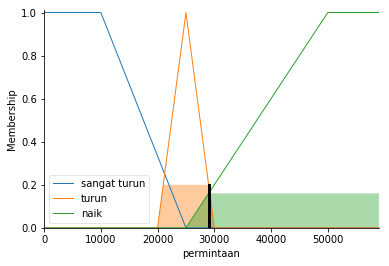

In [62]:
permintaan.view(sim=barang)

Plotting fungsi keangggotaan permintaan setelah dimasukkan input nilai 

C:\Users\PADHLI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


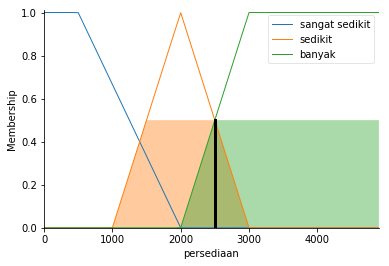

In [63]:
persediaan.view(sim=barang)

Plotting fungsi keangggotaan persediaan setelah dimasukkan input nilai 

C:\Users\PADHLI\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


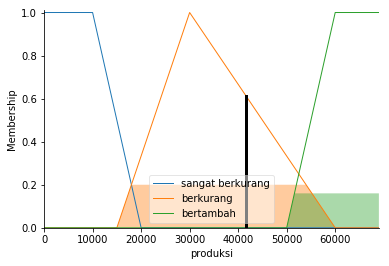

In [64]:
produksi.view(sim=barang)

Hasil grafik Plotting fungsi keangggotaan produksi setelah dimasukkan input nilai pada produksi

pada grafik diatas dapat disimpulkan bahwa nilai fuzzy nya adalah 41641.03524938442, dimana inputan permintaannya adalah 29.000 dan inputan persediaannya 2.500 dan hasilnya adalah produksi barang berkurang,tetapi nilai inputan ini tergantung dari nilai yang kalian input,ketika kalian memilih nilai input yang berbeda maka nilai fuzzynya akan berbeda.

### Perhitungan Manual

\begin{equation}
    Permintaan = 29.000 \\
    Masukkan\,nilai\,permintaan\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,permintaan\\
  permintaan['Sangat Turun'] = \mu Permintaan Sangat Turun(x)=\begin{cases}
    1, & \text{$0\leq x\leq10.000$}.\\
    (25000 - x)/(25.000 - 10.000) , & \text{$10.000 \leq x \leq 25.000$}.\\
    0, & \text{$x\geq 25.000 $ }.\checkmark
  \end{cases}
  \\
  Permintaan['Turun'] = \mu Permintan Turun(x)=\begin{cases}
    0, & \text{$x\leq 20.000$ atau $x\geq30.000$}. \\
    (x - 20,000)/(25.000 - 20.000) , & \text{$20.000 \leq x \leq 25.000$}.\\
    (30.000 - x)/(30.000 - 25.000) , & \text{$25.000 \leq x \leq 30.000$}.\checkmark\\
  \end{cases}
  \\
    Permintaan['Naik'] = \mu Permintaan Naik(x)=\begin{cases}
    0, & \text{$x\leq 25.000$}.\\
    (x - 25.000)/(60.000 - 25.000) , & \text{$25.000\leq x \leq 30.000$}.\checkmark\\
    1, & \text{$x\geq 30.000$}.\\
  \end{cases}
\end{equation}



\begin{equation}
    \mu permintaanturun(2.500) = (30.000- x) / (30.000 - 25.000) \\
    \mu permintaanturun(2.500) = 1000/5.000 \\ 
    \mu permintaanturun(2.500) = 0,2 \\
    \mu permintaannaik(2.500) = (29.000 - 25.000) / (60.000-25.000) \\
    \mu permintaannaik(2.500) = 4000/5.000 \\
    \mu permintaannaik(2.500) = 0,8\\
\end{equation}

\begin{equation}
    persediaan = 2.500 \\
    Masukkan\,nilai\,permintaan\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,persediaan\\
  persediaan['Sangat Sedikit'] = \mu persediaan Sangat Sedikit(x)=\begin{cases}
    1, & \text{$1\leq x\leq5.00$}.\\
    (2.000 - x)/(2.000 - 5.00) , & \text{$5.00 \leq x \leq 2.000$}.\\
    0, & \text{$x\geq 2.000 $ }.\checkmark
  \end{cases}
  \\
  persediaan['Sedikit'] = \mu persediaan Sedikit(x)=\begin{cases}
    0, & \text{$x\leq 1.000$ atau $x\geq3.000$}.\\
    (x - 1.000)/(2.000 - 1.000) , & \text{$1.000 \leq x \leq 2.000$}.\\
    (3.000 - x)/(3.000 - 2.000) , & \text{$2.000 \leq x \leq 3.000$}.\checkmark\\
  \end{cases}
  \\
    persediaan['Banyak'] = \mu persediaan Banyak(x)=\begin{cases}
    0, & \text{$x\leq 2.000$}.\\
    (x - 2.000)/(5.000 - 2.000) , & \text{$2.000\leq x \leq 5.000$}.\checkmark\\
    1, & \text{$x\geq 5.000$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu PersediaanSedikit(2.500) = (3.000- 2.500) / (3.000 - 2.000) \\
    \mu PersediaanSedikit(2.500) = 500/1.000 \\ 
    \mu PersediaanSedikit(2.500) = 0,5 \\
    \mu PersediaanBanyak(2.500) = (2.500 - 2.000) / (5.000-2.000) \\
    \mu PersediaanBanyak(2.500) = 500/3.000 \\
    \mu PersediaanBanyak(2.500) = 0,16\\
\end{equation}

#### Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 .IF permintaan sangat turun  dan persediaan sangat sedikit  THEN produksi sangat berkurang

$$ \\ \alpha(predikat_1) = \mu Permintaan Sangat Turun \cap \mu Persediaan Sangat Sedikit $$
$$\alpha(predikat_1)   = min (\mu Permintaan Sangat Turun[35.000], \mu Persediaan Sangat Sedikit[2.500]) $$
$$ \alpha(predikat_1) = min (0; 0) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Produksi Sangat Berkurang 
$$
   Produksi['Sangat Berkurang'] = \mu ProduksiSangatBerkurang(x)=\begin{cases}
    1, & \text{$0\leq x \leq 20.000$}.\\
    \left.(20.000 - x) \,  \right/(20.000 - 10.000) , & \text{$10.000 \leq x \leq 20.000$}.\\
    0, & \text{$x\geq 20.000$}.
  \end{cases}
  \\
 $$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 .IF permintaan sangat turun  dan persediaan  sedikit  THEN produksi berkurang

$$ \\ \alpha(predikat_2) = \mu PermintaanSangatTurun \cap \mu PersediaanSedikit $$
$$\alpha(predikat_2)   = min (\mu PermintaanSangatTurun[35.000], \mu PersediaanSedikit[2.500]) $$
$$ \alpha(predikat_2) = min (0;0,5) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Produksi Berkurang
$$
    Produksi['Berkurang'] = \mu ProduksiBerkurang(x)=\begin{cases}
    0, & \text{$x\leq 15.000$ atau $x\geq60.000$}.\\
    \left.(x - 15.000)\, \right/(30.000 - 15.000) , & \text{$15.000 \leq x \leq 30.000$}.\\
    \left.(60.000 - x)\, \right/(60.000 - 30.000) , & \text{$30.000 \leq x \leq 60.000$}.\\
  \end{cases}
  \\
$$

Maka nilai $ Z_2 = 0 $

=================================================================================================================

3  .IF permintaan sangat turun  dan persediaan banyak  THEN produksi  berkurang

$$ \\ \alpha(predikat_3) = \mu PermintaanSangatTurun \cap \mu PersediaanBanyak $$
$$\alpha(predikat_3)   = min (\mu PermintaanSangatTurun[35.000], \mu PersediaanBanyak[2.500]) $$
$$ \alpha(predikat_3) = min (0;0,16) $$
$$ \alpha(predikat_3) = 0 $$

Lalu lihat himpunan Produksi Berkurang
$$
  \\
   Produksi['Berkurang'] = \mu ProduksiBerkurang(x)=\begin{cases}
    0, & \text{$x\leq 15.000$ atau $x\geq60.000$}.\\
    \left.(x - 15.000)\, \right/(30.000 - 15.000) , & \text{$15.000 \leq x \leq 30.000$}.\\
    \left.(60.000 - x)\, \right/(60.000 - 30.000) , & \text{$30.000 \leq x \leq 60.000$}.\\
  \end{cases}
  \\
$$
Maka nilai $ Z_3 = 0 $


=================================================================================================================

4 .IF permintaan  turun  dan persediaan sangat sedikit  THEN produksi sangat berkurang

$$ \\ \alpha(predikat_4) = \mu PermintaanTurun \cap \mu PersediaanSangatSedikit $$
$$\alpha(predikat_4)   = min (\mu PermintaanTurun[35.000], \mu PersediaanSangatSedikit[2.500]) $$
$$ \alpha(predikat_4) = min (0,2;0) $$
$$ \alpha(predikat_4) = 0 $$

Lalu lihat himpunan Produksi Sangat Berkurang
$$ Produksi['Sangat Berkurang'] = \mu ProduksiSangatBerkurang(x)=\begin{cases}
    1, & \text{$0\leq x \leq 20.000$}.\\
    \left.(20.000 - x) \,  \right/(20.000 - 10.000) , & \text{$10.000 \leq x \leq 20.000$}.\\
    0, & \text{$x\geq 20.000$}.
  \end{cases}
  \\
$$
Maka nilai Z$_4$ = 0


=================================================================================================================
5 .IF permintaan  turun  dan persediaan  sedikit  THEN produksi  berkurang

$$ \\ \alpha(predikat_5) = \mu PermintaanTurun \cap \mu PermintaanSedikit $$
$$\alpha(predikat_5)   = min (\mu PermintaanTurun[35.000], \mu PermintaanSedikit[2.500]) $$
$$ \alpha(predikat_5) = min (0,2;0,5) $$
$$ \alpha(predikat_5) = 0,2 $$

Lalu lihat himpunan Produksi Berkurang
$$
     Produksi['Berkurang'] = \mu ProduksiBerkurang(x)=\begin{cases}
    0, & \text{$x\leq 15.000$ atau $x\geq60.000$}.\\
    \left.(x - 15.000)\, \right/(30.000 - 15.000) , & \text{$15.000 \leq x \leq 30.000$}.\\
    \left.(60.000 - x)\, \right/(60.000 - 30.000) , & \text{$30.000 \leq x \leq 60.000$}.\\
  \end{cases}
  \\
$$
Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 15.000) / (30.000 - 15.000) = 0.2 $$
 $$ x - 15.000 = 15000 \times 0.2 $$
 $$ x - 15.000 = 3000$$
 $$ x = 18,000 $$
 
 $$ (60000 -x) / (60000 -30000) = 0.2 $$
 $$ (60000 - x) = 6000 $$
 $$ - x = -44000 $$
 $$ x = 44000 $$
Akan diambil nilai terkecil
Maka nilai $ Z_3 = 18,000 $


=================================================================================================================

6 .IF permintaan  turun  dan persediaan banyak  THEN produksi berkurang

$$ \\ \alpha(predikat_6) = \mu PermintaanTurun \cap \mu PersediaanBanyak $$
$$\alpha(predikat_6)   = min (\mu PermintaanTurun[35.000], \mu PersediaanBanyak[2.500]) $$
$$ \alpha(predikat_6) = min (0,2;0,16) $$
$$ \alpha(predikat_6) = 0,16 $$

Lalu lihat himpunan Produksi Berkurang
$$
    Produksi['Berkurang'] = \mu ProduksiBerkurang(x)=\begin{cases}
    0, & \text{$x\leq 15.000$ atau $x\geq60.000$}.\\
    \left.(x - 15.000)\, \right/(30.000 - 15.000) , & \text{$15.000 \leq x \leq 30.000$}.\\
    \left.(60.000 - x)\, \right/(60.000 - 30.000) , & \text{$30.000 \leq x \leq 60.000$}.\\
  \end{cases}
  \\
$$

Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 15.000) / (30.000 - 15.000) = 0.16 $$
 $$ x - 15.000 = 15000 \times 0,16 $$
 $$ x - 15.000 = 2400 $$
 $$ x = 17400 $$
 
 $$ (60000 -x) / (60000 -30000) = 0.16 $$
 $$ (60000 - x) = 30000 $$
 $$ - x = -30000 $$
 $$ x = 30000 $$
 
Akan diambil nilai terkecil
Maka nilai $ Z_3 = 17400 $


=================================================================================================================

7 .IF permintaan naik  dan persediaan sangat sedikit  THEN produksi  berkurang                                                                           

$$ \\ \alpha(predikat_7) = \mu PermintaanNaik \cap \mu PersediaanSangatSedikit $$
$$\alpha(predikat_7)   = min (\mu PermintaanNaik[35.000], \mu PersediaanSangatSedikit[2.500]) $$
$$ \alpha(predikat_7) = min (0,8;0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Produksi Berkurnag

$$
    Produksi['Berkurang'] = \mu ProduksiBerkurang(x)=\begin{cases}
    0, & \text{$x\leq 15.000$ atau $x\geq60.000$}.\\
    \left.(x - 15.000)\, \right/(30.000 - 15.000) , & \text{$15.000 \leq x \leq 30.000$}.\\
    \left.(60.000 - x)\, \right/(60.000 - 30.000) , & \text{$30.000 \leq x \leq 60.000$}.\\
  \end{cases}
  \\
$$
Maka nilai Z$_7$ = 0

=================================================================================================================

8 .IF permintaan naik  dan persediaan  sedikit THEN produksi bertambah

$$ \\ \alpha(predikat_8) = \mu PermintaanNaik \cap \mu PersediaanSedikit$$
$$\alpha(predikat_8)   = min (\mu PermintaanNaik[35.000], \mu PersediaanSedikit[2.500]) $$
$$ \alpha(predikat_8) = min (0,8;0,5) $$
$$ \alpha(predikat_8) = 0,5 $$

Lalu lihat himpunan Produksi Bertambah
$$
  \\
  Produksi['Bertambah'] = \mu ProduksiBertambah(x)=\begin{cases}
    0, & \text{$x \leq 50.000$}.\\
    \left.(x - 50.000) \,  \right/(60.000 - 50.000) , & \text{$50.000 \leq x \leq 60.000$}.\\
    1, & \text{$x\geq 60.000$}.
  \end{cases}
$$
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(x-50.000) / (60.000-50.000) = 0.5 \\
(x-50.000) = 2.500 \\ 
x = 52.500 \\
$$
Maka nilai Z$_8$ = 52.500

=================================================================================================================

9 .IF permintaan naik  dan persediaan banyak  THEN produksi bertambah
$$ \\ \alpha(predikat_9) = \mu PermintaanNaik \cap \mu PersediaanBnyak $$
$$\alpha(predikat_9)   = min (\mu PermintaanNaik[35.000], \mu PersediaanBanyak[2.500]) $$
$$ \alpha(predikat_9) = min (0,8;0,16) $$
$$ \alpha(predikat_9) = 0,16 $$

Lalu lihat himpunan Produksi Bertambah
$$ 
 Produksi['Bertambah'] = \mu ProduksiBertambah(x)=\begin{cases}
    0, & \text{$x \leq 50.000$}.\\
    \left.(x - 50.000) \,  \right/(60.000 - 50.000) , & \text{$50.000 \leq x \leq 60.000$}.\\
    1, & \text{$x\geq 60.000$}.
  \end{cases}
$$
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(x-50.000) / (60.000-50.000) = 0.16\\
(x-50.000) =1,600 \\ 
x = 51,600 \\
$$
Maka nilai keanggotaan yang memenuhi adalah 51,600
Maka nilai Z$_9$ = 51,600

=================================================================================================================





Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9} +$$


$$Z = \frac{0 + 0 + 0 + 0 + 0,2 \times 18.000 + 0,16 \times 17400 + 0  + 0,5 \times 52.500 + 0,16 \times 51,600}{0 + 0 + 0 + 0 + 0,2 + 0,16  +0 +0,5 +0,16} 
$$
 
 $$ Z = \frac{3.600 + 2,784 + 26,250 + 8256}{1,02} $$
 $$ Z = \frac{40,890}{1,02} $$
 $$ Z = 40.088,2 $$

Hasil output menggunakan code pyhton sebesar 41.641,0 sedangkan perhitungan manualnya sebesar 40.088,2 dari 2  perhitungan ini terdapat nilai perbedaannya sebesar 1.553 dengan nilai eror sebesar 3,72%

#### Link Reperensi paper 
https://ejournal.unitomo.ac.id/index.php/mipa/article/view/453/309
 